In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from json import load

In [14]:
path_with_auction = 'data_collector/results/3 fogs and 60 clients with auction (20s)/2023-03-21 12:22:03.334927'
path_without_auction = 'data_collector/results/3 fogs and 60 clients without auction (20s)/2023-03-21 12:27:38.970315'

In [45]:
response_time_with_auction_df = pd.read_csv(f'{path_with_auction}/response_time.csv')
response_time_without_auction_df = pd.read_csv(f'{path_without_auction}/response_time.csv')
with open(f'{path_without_auction}/env.json', 'r') as env_file:
    env = load(env_file)

In [46]:
env

{'QUANTITY_FOGS': 3,
 'QUANTITY_CLIENTS': 60,
 'MESSAGE_PROCESSING_CPU_THRESHOLD': 75,
 'SIMULATION_TIME': 20,
 'ACTIVATE_AUCTION': 0,
 'CLOUD_LATENCY': 50,
 'PROCESS_MESSAGE_LEADING_ZEROS': 3,
 'PROCESS_MESSAGE_FUNCTION_REPEAT': 7,
 'WARMUP_TIME': 1}

In [16]:
resolved_by_cloud_with_auction = response_time_with_auction_df[response_time_with_auction_df.resolved_by_cloud == 1]
resolved_by_fogs_with_auction = response_time_with_auction_df[response_time_with_auction_df.resolved_by_cloud == 0]

resolved_by_cloud_without_auction = response_time_without_auction_df[response_time_without_auction_df.resolved_by_cloud == 1]
resolved_by_fogs_without_auction = response_time_without_auction_df[response_time_without_auction_df.resolved_by_cloud == 0]

In [17]:
mean_response_time_fogs_with_auction = resolved_by_fogs_with_auction['response_time'].mean()
mean_response_time_cloud_with_auction = resolved_by_cloud_with_auction['response_time'].mean()

mean_response_time_fogs_without_auction = resolved_by_fogs_without_auction['response_time'].mean()
mean_response_time_cloud_without_auction = resolved_by_cloud_without_auction['response_time'].mean()

In [51]:
y_fogs_with_auction = [mean_response_time_fogs_with_auction]
y_fogs_without_auction = [mean_response_time_fogs_without_auction]

y_cloud_with_auction = [mean_response_time_cloud_with_auction]
y_cloud_without_auction = [mean_response_time_cloud_without_auction]

In [47]:
configs = [env]

In [39]:
barwidth = 0.2
indice = np.arange(len(y_fogs_with_auction))
x1 = [x - barwidth for x in indice]
x2 = [x + barwidth for x in indice]

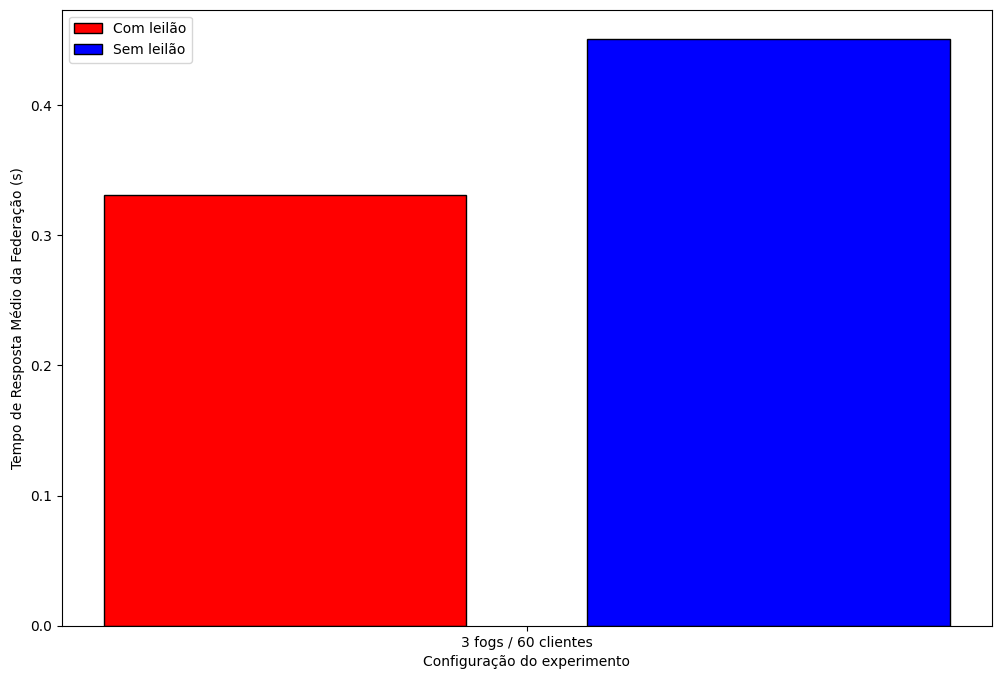

In [50]:
fig = plt.subplots(figsize =(12, 8))
plt.bar(
    x1,
    y_fogs_with_auction,
    color='r',
    edgecolor='black',
    label='Com leilão',
    width= 1.5*barwidth
)
plt.bar(
    x2, 
    y_fogs_without_auction,
    color='b',
    edgecolor='black',
    label='Sem leilão',
    width= 1.5*barwidth
)
plt.xlabel('Configuração do experimento')
plt.ylabel('Tempo de Resposta Médio da Federação (s)')
plt.xticks(
    [r for r in range(len(y_fogs_with_auction))],
    [f'{config["QUANTITY_FOGS"]} fogs / {config["QUANTITY_CLIENTS"]} clientes' for config in configs]
    )
plt.legend()
plt.show()

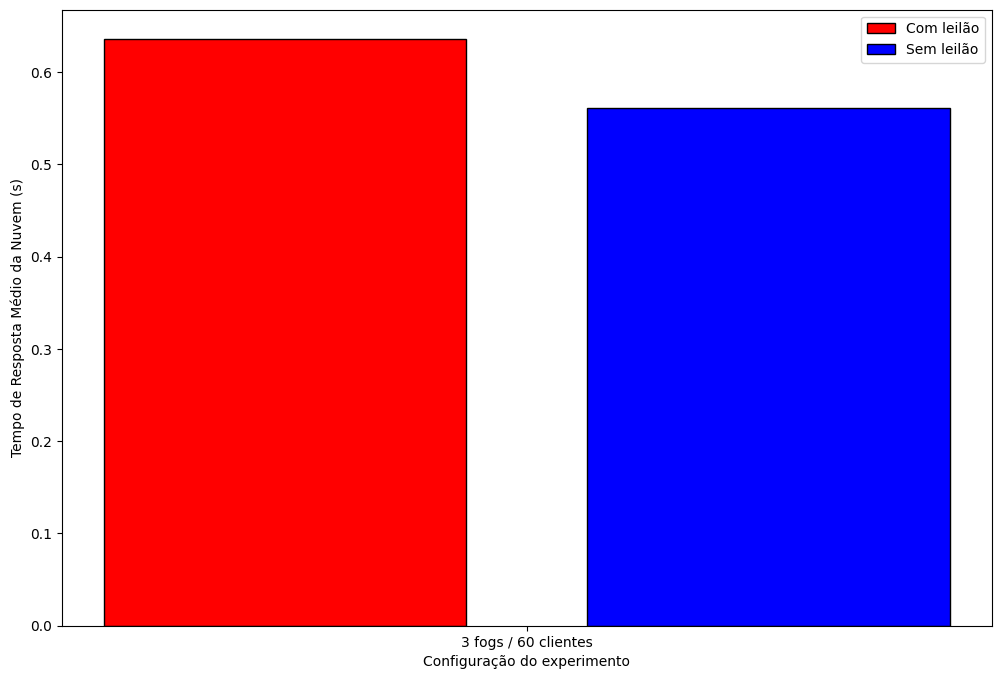

In [53]:
fig = plt.subplots(figsize =(12, 8))
plt.bar(
    x1,
    y_cloud_with_auction,
    color='r',
    edgecolor='black',
    label='Com leilão',
    width= 1.5*barwidth
)
plt.bar(
    x2, 
    y_cloud_without_auction,
    color='b',
    edgecolor='black',
    label='Sem leilão',
    width= 1.5*barwidth
)
plt.xlabel('Configuração do experimento')
plt.ylabel('Tempo de Resposta Médio da Nuvem (s)')
plt.xticks(
    [r for r in range(len(y_fogs_with_auction))],
    [f'{config["QUANTITY_FOGS"]} fogs / {config["QUANTITY_CLIENTS"]} clientes' for config in configs]
    )
plt.legend()
plt.show()